# Home Advantage in Soccer
## Alexander Escamilla

In [132]:
import pandas as pd
import numpy as np

In [133]:
df_S = pd.read_csv('SoccerLEagues.csv')
df_S

,Sport,Country,League,Year,Season,Team,Games,HomeWins,HomeDraw,HomeLoss,HomeRatio,AwayWins,AwayDraw,AwayLoss,AwayGoalsDiff,Unnamed: 15
0,Football,Algeria,Algeria-Ligue-1,2010,-,MC Oran,34,10,5,2,11,0,6,11,-20,NaN
1,Football,Algeria,Algeria-Ligue-1,2010,-,NA Hussein Dey,34,3,5,9,-8,0,5,12,-19,NaN
2,Football,Algeria,Algeria-Ligue-1,2011,-,MC El Eulma,29,9,3,2,13,0,6,9,-19,NaN
3,Football,Algeria,Algeria-Ligue-1,2011,-,Annaba,29,10,5,0,14,0,1,13,-23,NaN
4,Football,Algeria,Algeria-Ligue-1,2012,-,Khroub,30,7,5,3,0,0,5,10,-23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8360,Football,Zimbabwe,Zimbabwe-Premier-Soccer-League,2011,apertura,Gunners,23,4,5,4,-1,4,1,5,0,NaN
8361,Football,Zimbabwe,Zimbabwe-Premier-Soccer-League,2010,apertura,Gunners,30,6,6,3,8,8,5,2,11,NaN
8362,Football,Zimbabwe,Zimbabwe-Premier-Soccer-League,2010,apertura,CAPS United,30,5,6,4,7,8,3,4,6,NaN
8363,Football,Zimbabwe,Zimbabwe-Premier-Soccer-League,2009,apertura,Eagles,30,3,10,2,1,5,4,6,-9,NaN


In [134]:
df_S.shape

(8365, 16)

In [135]:
df_S.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8365 entries, 0 to 8364
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sport          8365 non-null   object
 1   Country        8365 non-null   object
 2   League         8365 non-null   object
 3   Year           8365 non-null   int64 
 4   Season         8365 non-null   object
 5   Team           8365 non-null   object
 6   Games          8365 non-null   int64 
 7   HomeWins       8365 non-null   int64 
 8   HomeDraw       8365 non-null   int64 
 9   HomeLoss       8365 non-null   int64 
 10  HomeRatio      8365 non-null   int64 
 11  AwayWins       8365 non-null   int64 
 12  AwayDraw       8365 non-null   int64 
 13  AwayLoss       8365 non-null   int64 
 14  AwayGoalsDiff  8365 non-null   int64 
 15  Unnamed: 15    2 non-null      object
dtypes: int64(10), object(6)
memory usage: 1.0+ MB


In [136]:
df_S.dtypes

Sport            object
Country          object
League           object
Year              int64
Season           object
Team             object
Games             int64
HomeWins          int64
HomeDraw          int64
HomeLoss          int64
HomeRatio         int64
AwayWins          int64
AwayDraw          int64
AwayLoss          int64
AwayGoalsDiff     int64
Unnamed: 15      object
dtype: object

In [137]:
df_S.isnull().sum()

Sport               0
Country             0
League              0
Year                0
Season              0
Team                0
Games               0
HomeWins            0
HomeDraw            0
HomeLoss            0
HomeRatio           0
AwayWins            0
AwayDraw            0
AwayLoss            0
AwayGoalsDiff       0
Unnamed: 15      8363
dtype: int64

In [138]:
columns = [
    'Year','Team', 'Games',
    'HomeWins', 'HomeDraw', 'HomeLoss',
    'AwayWins', 'AwayDraw', 'AwayLoss'
]

def extract_team(df, team_name):
    return df.loc[
        (df['Team'] == team_name) & (df['Year'] == 2010),
        columns
    ]

In [139]:
teamL = extract_team(df_S, 'Manchester United')
teamL

,Year,Team,Games,HomeWins,HomeDraw,HomeLoss,AwayWins,AwayDraw,AwayLoss
2423,2010,Manchester United,38,16,1,2,11,3,5


In [140]:
teamR = extract_team(df_S, 'Real Madrid')
teamR

,Year,Team,Games,HomeWins,HomeDraw,HomeLoss,AwayWins,AwayDraw,AwayLoss
6852,2010,Real Madrid,38,18,0,1,13,3,3


In [141]:
teamB = extract_team(df_S, 'Barcelona')
teamB

,Year,Team,Games,HomeWins,HomeDraw,HomeLoss,AwayWins,AwayDraw,AwayLoss
6851,2010,Barcelona,38,18,1,0,13,5,1


In [142]:
teamBM = extract_team(df_S, 'Arsenal')
teamBM

,Year,Team,Games,HomeWins,HomeDraw,HomeLoss,AwayWins,AwayDraw,AwayLoss
2398,2010,Arsenal,38,15,2,2,8,4,7


In [143]:
teamBD = extract_team(df_S, 'Chelsea')
teamBD

,Year,Team,Games,HomeWins,HomeDraw,HomeLoss,AwayWins,AwayDraw,AwayLoss
2410,2010,Chelsea,38,17,1,1,10,4,5


In [144]:
teamL  = extract_team(df_S, 'Manchester United')
teamR  = extract_team(df_S, 'Real Madrid')
teamB  = extract_team(df_S, 'Barcelona')
teamBM = extract_team(df_S, 'Arsenal')
teamBD = extract_team(df_S, 'Chelsea')

df_top5 = pd.concat(
    [teamL, teamR, teamB, teamBM, teamBD],
    ignore_index=True
)

df_top5

,Year,Team,Games,HomeWins,HomeDraw,HomeLoss,AwayWins,AwayDraw,AwayLoss
0,2010,Manchester United,38,16,1,2,11,3,5
1,2010,Real Madrid,38,18,0,1,13,3,3
2,2010,Barcelona,38,18,1,0,13,5,1
3,2010,Arsenal,38,15,2,2,8,4,7
4,2010,Chelsea,38,17,1,1,10,4,5


In [145]:
stats = df_top5.describe()
stats

,Year,Games,HomeWins,HomeDraw,HomeLoss,AwayWins,AwayDraw,AwayLoss
count,5.0,5.0,5.00000,5.000000,5.00000,5.00000,5.00000,5.000000
mean,2010.0,38.0,16.80000,1.000000,1.20000,11.00000,3.80000,4.200000
std,0.0,0.0,1.30384,0.707107,0.83666,2.12132,0.83666,2.280351
min,2010.0,38.0,15.00000,0.000000,0.00000,8.00000,3.00000,1.000000
25%,2010.0,38.0,16.00000,1.000000,1.00000,10.00000,3.00000,3.000000
50%,2010.0,38.0,17.00000,1.000000,1.00000,11.00000,4.00000,5.000000
75%,2010.0,38.0,18.00000,1.000000,2.00000,13.00000,4.00000,5.000000
max,2010.0,38.0,18.00000,2.000000,2.00000,13.00000,5.00000,7.000000


In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

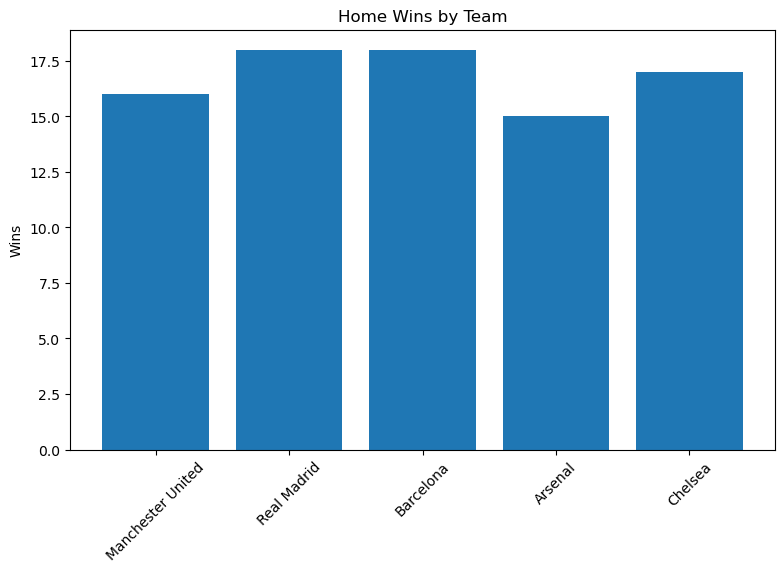

In [147]:
fig = plt.figure(figsize=(20, 12))

ax1 = fig.add_subplot(2, 2, 1)
ax1.bar(df_top5['Team'], df_top5['HomeWins'])
ax1.set_title("Home Wins by Team")
ax1.set_ylabel("Wins")
ax1.tick_params(axis='x', rotation=45)


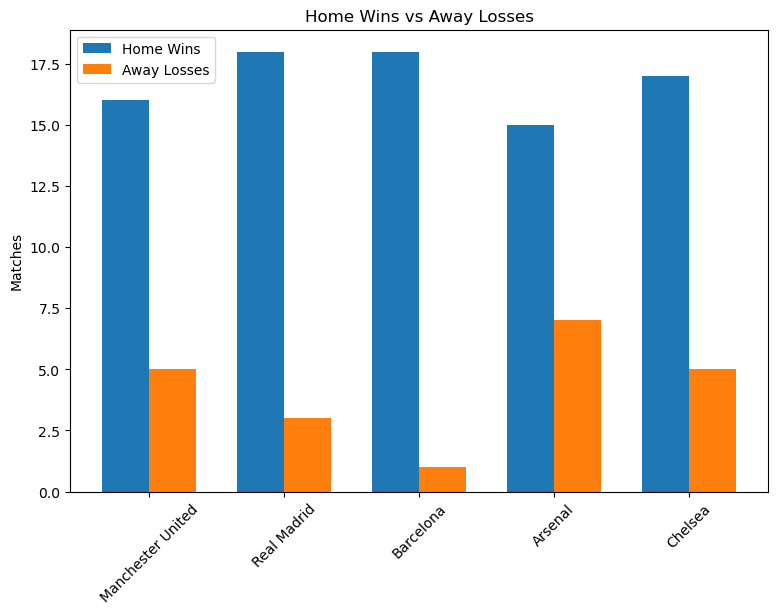

In [153]:
teams = df_top5['Team']
x = np.arange(len(teams))
width = 0.35

plt.figure(figsize=(9,6))
plt.bar(x - width/2, df_top5['HomeWins'], width, label='Home Wins')
plt.bar(x + width/2, df_top5['AwayLoss'], width, label='Away Losses')

plt.xticks(x, teams, rotation=45)
plt.ylabel('Matches')
plt.title('Home Wins vs Away Losses')
plt.legend()
plt.show()

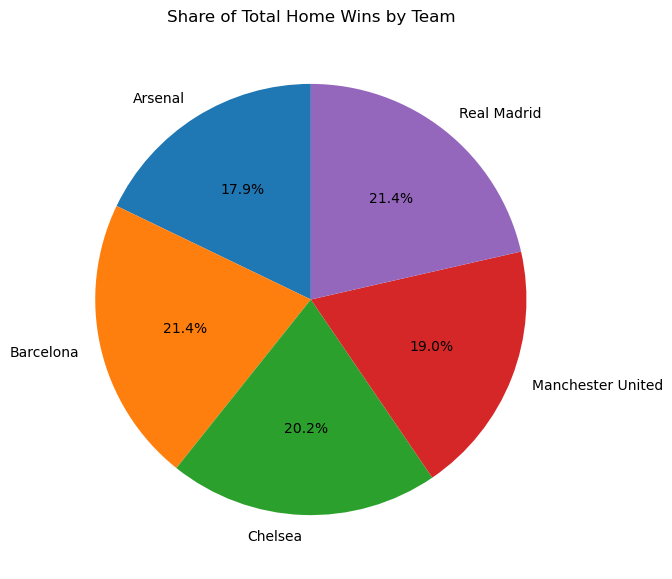

In [160]:
home_wins_by_team = df_top5.groupby('Team')['HomeWins'].sum()

plt.figure(figsize=(7,7))
plt.pie(
    home_wins_by_team.values,
    labels=home_wins_by_team.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Share of Total Home Wins by Team')
plt.show()

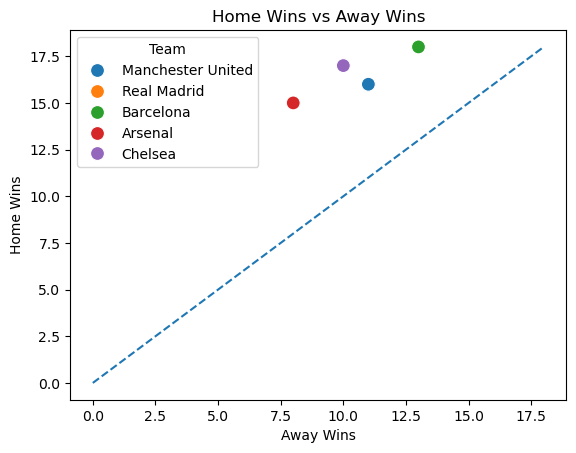

In [163]:
sns.scatterplot(
    data=df_top5,
    x='AwayWins',
    y='HomeWins',
    hue='Team',
    s=100
)
plt.plot([0, df_top5[['HomeWins','AwayWins']].max().max()],
         [0, df_top5[['HomeWins','AwayWins']].max().max()],
         linestyle='--')
plt.title('Home Wins vs Away Wins')
plt.xlabel('Away Wins')
plt.ylabel('Home Wins')
plt.show()

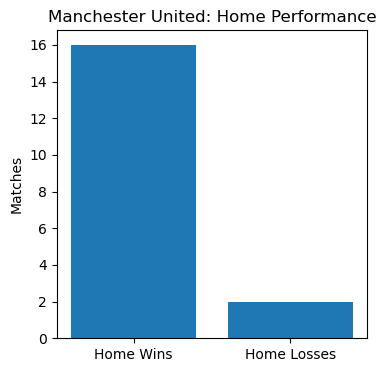

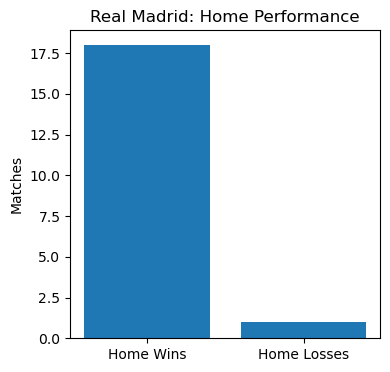

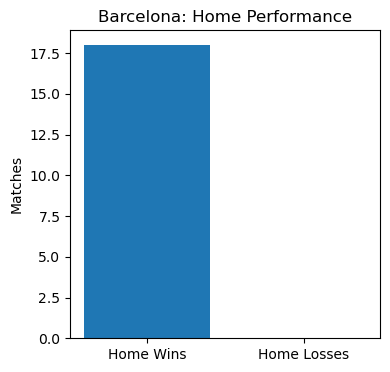

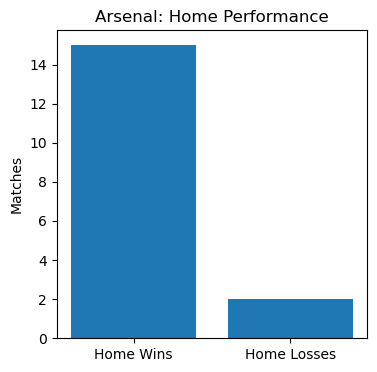

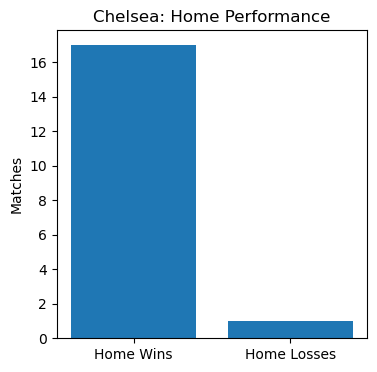

In [173]:
for index, row in df_top5.iterrows():
    team = row['Team']
    wins = row['HomeWins']
    losses = row['HomeLoss']

    x = np.arange(2)

    plt.figure(figsize=(4,4))
    plt.bar(x, [wins, losses])
    plt.xticks(x, ['Home Wins', 'Home Losses'])
    plt.ylabel('Matches')
    plt.title(f'{team}: Home Performance')
    plt.show()